/kaggle/input/north-oc-housing-data/north_county_oc - Sheet1.csv
Index(['02/01/2022', '12/01/2021', '11/01/2021', '10/01/2021', '09/01/2021',
       '08/01/2021', '04/01/2021', '10/01/2020', '08/01/2020', '03/01/2020',
       ...
       '08/01/1985', '05/01/1985', '08/01/1984', '02/01/1984', '05/01/1982',
       '06/01/1981', '04/01/1981', '05/01/1979', '08/01/1977', '03/01/1977'],
      dtype='object', length=181)


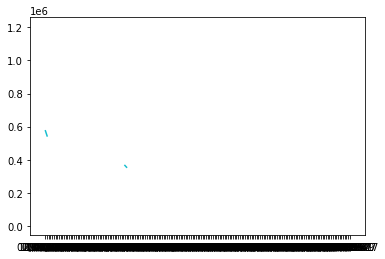

                                       id                         address  \
0    e8fc53f5-fd78-4cbd-ab92-fc55f073186a         12688 Chapman Ave #3313   
1    bd809870-7f45-46bc-9201-3b41cc70ae8e               237 California Ct   
2    404648d0-c298-4aef-a298-59c2a771d1d2       2550 San Gabriel Way #301   
3    7df6c1ed-0db3-4b90-9254-8155ca5d4bd8  23412 Pacific Park Dr Unit 12C   
4    dd23d0db-5d56-42c5-8314-824e809611e7         12688 Chapman Ave #3102   
..                                    ...                             ...   
104  9af292ed-62df-461a-934a-a3a39f5eafee      1250 S Brookhurst St #2061   
105  8ba500f3-da26-4ffb-92ca-d0a861801b7a           7100 Cerritos Ave #41   
106  a53a99dc-218a-44e3-9f47-c2a64a2b2d97            25773 Via Lomas #162   
107  01dd108e-007c-4eb6-8270-e1c007d5eb44      5487 E Willow Woods Ln #80   
108  59ea5466-87f7-4dd5-9569-73bace119cb7               16101 Central Ave   

              city state      zip  currentestimate  askingprice  saleprice 

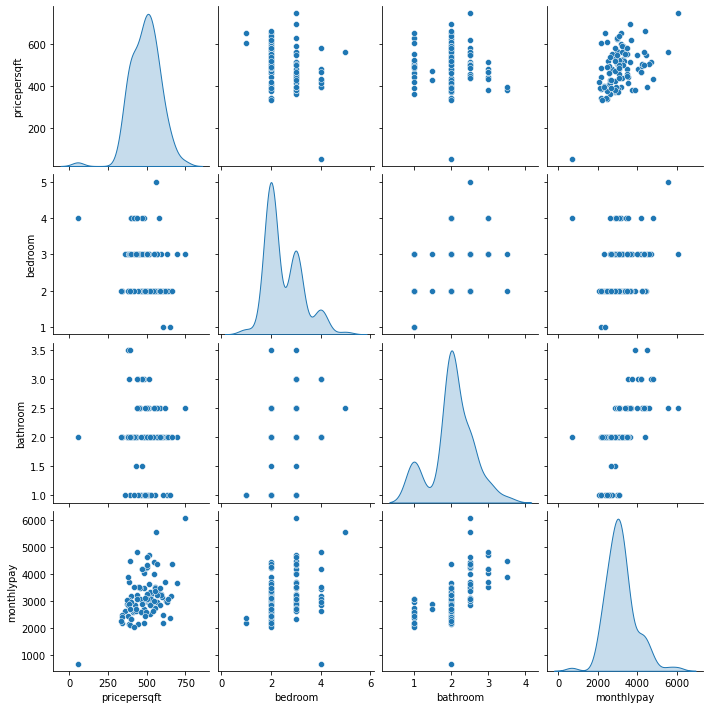

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting library 
import seaborn as sns # data visualization library 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import re

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# rename_cols
# parameter: c - columns 
# replaces the column names with the prefix history-
# and adds the appropriate dates to the history 
def rename_cols(c): 
    if c.startswith("history-"):
        return re.sub(r'([0-9]{2})([0-9]{4})', r'\1/01/\2', c.replace("history-", ""))
    
    return c

df = pd.read_csv('/kaggle/input/north-oc-housing-data/north_county_oc - Sheet1.csv')
#making a copy of the dataframe
# Dropping the rows with the value of n/a for the address
data = df.dropna(axis=0, how='all', thresh=None, subset=['address'], inplace=False).copy()
# Rename the columns using the function rename_cols
data.rename(columns=lambda c: rename_cols(c), inplace=True)

##checking for all the null values
data.isnull().sum()

##summary statistics of quantitative variables
data.describe()

##looking at horsepower box plot
# sns.boxplot(x=data['points'])

## adding a price column
## this combines the following columns 
## currentestimate is first since it assumes that 
## the property has not been sold. Sales price is for a 
## recently sold property. Last is the asking price since
## the property is on the market
data['price'] = data['currentestimate'].combine_first(data["saleprice"]).combine_first(data["askingprice"])

# sns.boxplot(x=data['price'])
data['pricepersqft'] = data['price']/data['squareft']

#sns.boxplot(x=data['pricepersqft'])

pricehistory = data.loc[:, ~data.columns.isin(['type', 'firstfloorentry', 'yearbuilt', 'newhousing', 'mls', 'rate', 'insurance', 'above2300', 'redfin', 'id', 'city', 'zip', 'squareft', 'monthlypay', 'bedroom', 'bathroom', 'hoa', 'state', 'currentestimate', 'askingprice', 'saleprice', 'datesold', 'salesdiff', 'points', '55plus', 'lottransfer', 'stronglyconsider', 'buy', 'pricepersqft'])].rename(columns={"price": "02/01/2022"})
# shift column of recent price to second position
move_date = pricehistory.pop('02/01/2022')
  
pricehistory.insert(1, '02/01/2022', move_date)
pricecolumns = pricehistory.columns.delete(0)
print(pricecolumns)

for index, row in pricehistory.iterrows():
    address = row.pop('address')
    plt.plot(pricecolumns,row,label=address)
plt.show()

##pairplots to get an intuition of potential correlations
data['monthlypay'] = data['monthlypay'].replace('[\$,]', '', regex=True).astype(float)

sns.pairplot(data[["pricepersqft", "bedroom", "bathroom", "monthlypay"]], diag_kind="kde")
print(data)